In [1]:
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from shutil import copyfile

import tensorflow as tf
from keras import backend as K
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, Reshape, Bidirectional, LSTM, Dense, Lambda, Activation, BatchNormalization, Dropout

In [2]:
data_train = pd.read_csv('written_name_train_v2.csv')
data_valid = pd.read_csv('written_name_validation_v2.csv')
data_test = pd.read_csv('written_name_test_v2.csv')

In [3]:
data_train.head()

,FILENAME,IDENTITY
0,TRAIN_00001.jpg,BALTHAZAR
1,TRAIN_00002.jpg,SIMON
2,TRAIN_00003.jpg,BENES
3,TRAIN_00004.jpg,LA LOVE
4,TRAIN_00005.jpg,DAPHNE


In [4]:
print("Jumlah NAN dalam train set      : ", data_train['IDENTITY'].isnull().sum())
print("Jumlah NAN dalam validation set : ", data_valid['IDENTITY'].isnull().sum())
print("Jumlah NAN dalam validation set : ", data_test['IDENTITY'].isnull().sum())

Jumlah NAN dalam train set      :  565
Jumlah NAN dalam validation set :  78
Jumlah NAN dalam validation set :  70


In [5]:
data_train.dropna(axis=0, inplace = True)
data_valid.dropna(axis=0, inplace = True)
data_test.dropna(axis=0, inplace = True)

In [6]:
print(len(data_train))
print(len(data_valid))
print(len(data_test))

330396
41292
41300


In [7]:
print("Jumlah Not Capital dalam train set      : ", len(data_train) - data_train['IDENTITY'].str.isupper().sum())
print("Jumlah Not Capital dalam validation set : ", len(data_valid) - data_valid['IDENTITY'].str.isupper().sum())
print("Jumlah Not Capital dalam test set : ", len(data_test) - data_test['IDENTITY'].str.isupper().sum())

Jumlah Not Capital dalam train set      :  30
Jumlah Not Capital dalam validation set :  2
Jumlah Not Capital dalam test set :  4


In [8]:
print(len(data_train[data_train['IDENTITY'] == 'UNREADABLE']))
print(len(data_valid[data_valid['IDENTITY'] == 'UNREADABLE']))
print(len(data_test[data_test['IDENTITY'] == 'UNREADABLE']))

102
12
11


In [9]:
!pip install opencv-python
import cv2

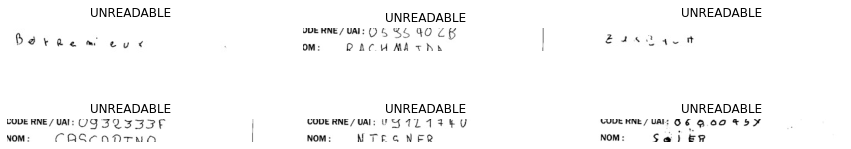

In [10]:
unreadable = data_train[data_train['IDENTITY'] == 'UNREADABLE']
unreadable.reset_index(inplace = True, drop=True)

plt.figure(figsize=(15, 10))

for i in range(6):
    ax = plt.subplot(2, 3, i+1)
    img_dir = 'train_v2/train/'+unreadable.loc[i, 'FILENAME']
    image = cv2.imread(img_dir, cv2.IMREAD_GRAYSCALE)
    plt.imshow(image, cmap = 'gray')
    plt.title(unreadable.loc[i, 'IDENTITY'], fontsize=12)
    plt.axis('off')

plt.subplots_adjust(wspace=0.2, hspace=-0.8)

In [11]:
data_train[~data_train['IDENTITY'].str.isupper()]

,FILENAME,IDENTITY
3891,TRAIN_03892.jpg,Rosso
10623,TRAIN_10624.jpg,yucel
14490,TRAIN_14491.jpg,poterlot
20507,TRAIN_20508.jpg,zucchi
23427,TRAIN_23428.jpg,-------
28125,TRAIN_28126.jpg,lemont
96559,TRAIN_96560.jpg,-
103472,TRAIN_103473.jpg,borne
128835,TRAIN_128836.jpg,guibal
140606,TRAIN_140607.jpg,-


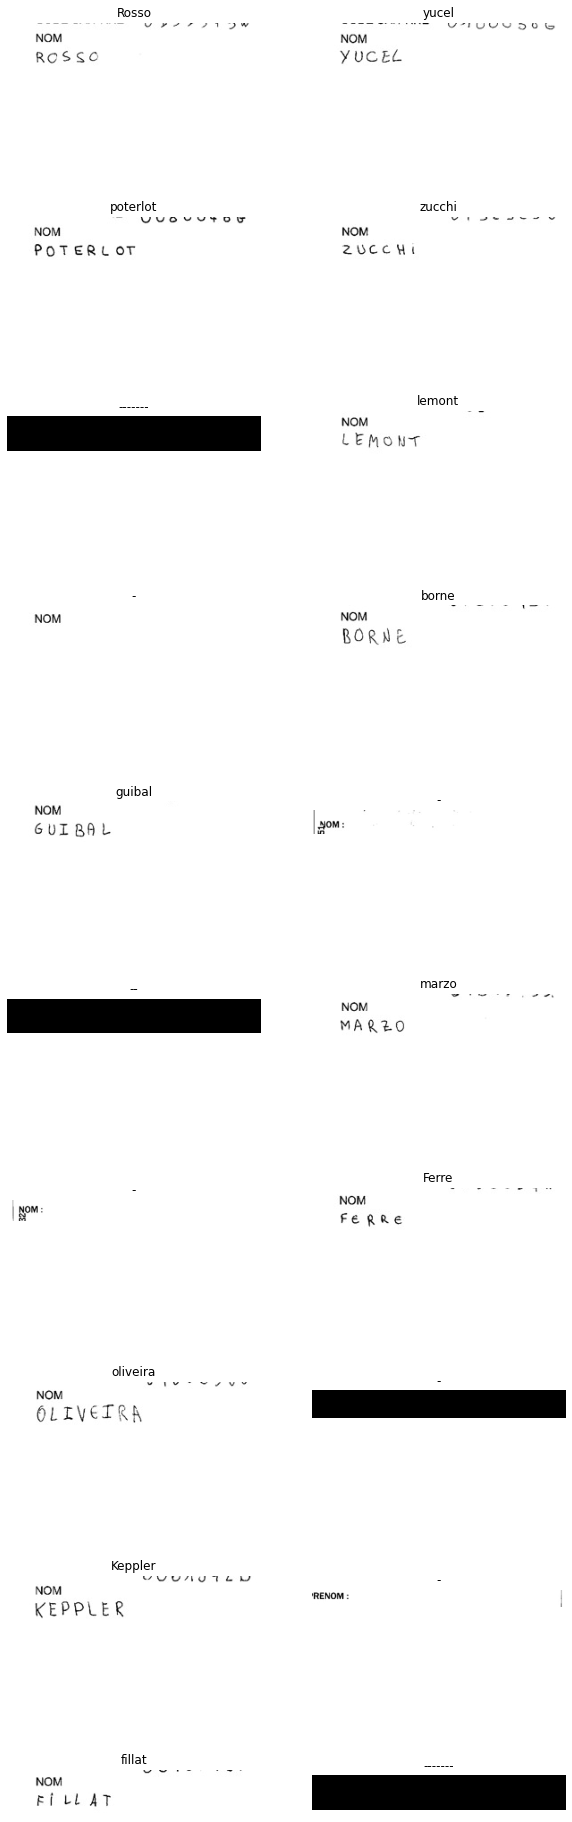

In [12]:
train_lower = data_train[~data_train['IDENTITY'].str.isupper()]
train_lower.reset_index(inplace = True, drop=True)

plt.figure(figsize=(10, 50))

for i in range(20):
    ax = plt.subplot(10, 2, i+1)
    img_dir = 'train_v2/train/'+train_lower.loc[i, 'FILENAME']
    image = cv2.imread(img_dir, cv2.IMREAD_GRAYSCALE)
    plt.imshow(image, cmap = 'gray')
    plt.title(train_lower.loc[i, 'IDENTITY'], fontsize=12)
    plt.axis('off')

plt.subplots_adjust(wspace=0.2, hspace=-0.8)

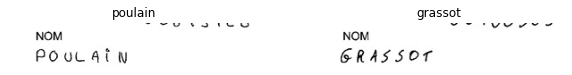

In [13]:
valid_lower = data_valid[~data_valid['IDENTITY'].str.isupper()]
valid_lower.reset_index(inplace = True, drop=True)

plt.figure(figsize=(10, 10))

for i in range(2):
    ax = plt.subplot(1, 2, i+1)
    img_dir = 'validation_v2/validation/'+valid_lower.loc[i, 'FILENAME']
    image = cv2.imread(img_dir, cv2.IMREAD_GRAYSCALE)
    plt.imshow(image, cmap = 'gray')
    plt.title(valid_lower.loc[i, 'IDENTITY'], fontsize=12)
    plt.axis('off')

plt.subplots_adjust(wspace=0.2, hspace=-0.8)

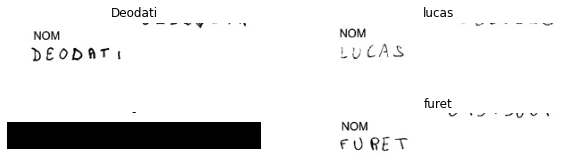

In [14]:
test_lower = data_test[~data_test['IDENTITY'].str.isupper()]
test_lower.reset_index(inplace = True, drop=True)

plt.figure(figsize=(10, 10))

for i in range(4):
    ax = plt.subplot(2, 2, i+1)
    img_dir = 'test_v2/test/'+test_lower.loc[i, 'FILENAME']
    image = cv2.imread(img_dir, cv2.IMREAD_GRAYSCALE)
    plt.imshow(image, cmap = 'gray')
    plt.title(test_lower.loc[i, 'IDENTITY'], fontsize=12)
    plt.axis('off')

plt.subplots_adjust(wspace=0.2, hspace=-0.8)

In [15]:
data_train['IDENTITY'] = data_train['IDENTITY'].str.upper()
data_valid['IDENTITY'] = data_valid['IDENTITY'].str.upper()
data_test['IDENTITY'] = data_test['IDENTITY'].str.upper()

In [16]:
data_train[~data_train['IDENTITY'].str.isupper()]

,FILENAME,IDENTITY
23427,TRAIN_23428.jpg,-------
96559,TRAIN_96560.jpg,-
140606,TRAIN_140607.jpg,-
141102,TRAIN_141103.jpg,--
203942,TRAIN_203943.jpg,-
215954,TRAIN_215955.jpg,-
221520,TRAIN_221521.jpg,-
249841,TRAIN_249842.jpg,-------
254492,TRAIN_254493.jpg,-----------------
269558,TRAIN_269559.jpg,-


In [20]:
data_test[~data_test['IDENTITY'].str.isupper()]

,FILENAME,IDENTITY
32259,TEST_32260.jpg,-


In [22]:
data_valid[~data_valid['IDENTITY'].str.isupper()]

,FILENAME,IDENTITY


In [25]:
data_train.loc[~data_train['IDENTITY'].str.isupper(), "IDENTITY"] = 'UNREADABLE'
data_valid.loc[~data_valid['IDENTITY'].str.isupper(), "IDENTITY"] = 'UNREADABLE'
data_test.loc[~data_test['IDENTITY'].str.isupper(), "IDENTITY"] = 'UNREADABLE'

In [43]:
print(len(data_train[data_train['IDENTITY'] == 'UNREADABLE']))
print(len(data_valid[data_valid['IDENTITY'] == 'UNREADABLE']))
print(len(data_test[data_test['IDENTITY'] == 'UNREADABLE']))

115
12
12


In [28]:
data_train.loc[data_train['IDENTITY'] != 'UNREADABLE', "IDENTITY"] = "READABLE"
data_valid.loc[data_valid['IDENTITY'] != 'UNREADABLE', "IDENTITY"] = "READABLE"
data_test.loc[data_test['IDENTITY'] != 'UNREADABLE', "IDENTITY"] = "READABLE"

In [49]:
Label_0_train = data_train.loc[data_train['IDENTITY'] != 'UNREADABLE', "FILENAME"].values.tolist()
Label_1_train = data_train.loc[data_train['IDENTITY'] == 'UNREADABLE', "FILENAME"].values.tolist()

In [60]:
Label_0_val = data_valid.loc[data_valid['IDENTITY'] != 'UNREADABLE', "FILENAME"].values.tolist()
Label_1_val = data_valid.loc[data_valid['IDENTITY'] == 'UNREADABLE', "FILENAME"].values.tolist()

In [62]:
Label_0_test = data_test.loc[data_test['IDENTITY'] != 'UNREADABLE', "FILENAME"].values.tolist()
Label_1_test = data_test.loc[data_test['IDENTITY'] == 'UNREADABLE', "FILENAME"].values.tolist()

In [65]:
print('Jumlah Gambar Training yang Bisa Dibaca:', len(Label_0_train))
print('Jumlah Gambar Training yang Tidak Dapat Dibaca:', len(Label_1_train))
print('Jumlah Gambar Validation yang Bisa Dibaca:', len(Label_0_val))
print('Jumlah Gambar Validation yang Tidak Dapat Dibaca:', len(Label_1_val))
print('Jumlah Gambar Test yang Bisa Dibaca:', len(Label_0_test))
print('Jumlah Gambar Test yang Tidak Dapat Dibaca:', len(Label_1_test))

Jumlah Gambar Training yang Bisa Dibaca: 330281
Jumlah Gambar Training yang Tidak Dapat Dibaca: 115
Jumlah Gambar Validation yang Bisa Dibaca: 41280
Jumlah Gambar Validation yang Tidak Dapat Dibaca: 12
Jumlah Gambar Test yang Bisa Dibaca: 41288
Jumlah Gambar Test yang Tidak Dapat Dibaca: 12


In [70]:
Label_0_train[:10]

['TRAIN_00001.jpg',
 'TRAIN_00002.jpg',
 'TRAIN_00003.jpg',
 'TRAIN_00004.jpg',
 'TRAIN_00005.jpg',
 'TRAIN_00006.jpg',
 'TRAIN_00007.jpg',
 'TRAIN_00008.jpg',
 'TRAIN_00009.jpg',
 'TRAIN_00010.jpg']

In [71]:
SOURCE_TRAIN = "./train_v2/train/"
TRAINING_0 = "./ForTraining/0/"
TRAINING_1 = "./ForTraining/1/"

os.makedirs(TRAINING_0)
os.makedirs(TRAINING_1)

for i in Label_0_train[:10000]:
    source = os.path.join(SOURCE_TRAIN, i)
    destination = os.path.join(TRAINING_0, i)
    copyfile(source, destination)
    
for i in Label_1_train:
    source = os.path.join(SOURCE_TRAIN, i)
    destination = os.path.join(TRAINING_1, i)
    copyfile(source, destination)

In [74]:
SOURCE_VAL = "./validation_v2/validation/"
VAL_0 = "./ForValidation/0/"
VAL_1 = "./ForValidation/1/"

os.makedirs(VAL_0)
os.makedirs(VAL_1)

for i in Label_0_val[:1000]:
    source = os.path.join(SOURCE_VAL, i)
    destination = os.path.join(VAL_0, i)
    copyfile(source, destination)
    
for i in Label_1_val:
    source = os.path.join(SOURCE_VAL, i)
    destination = os.path.join(VAL_1, i)
    copyfile(source, destination)

In [78]:
SOURCE_TEST = "./test_v2/test/"
TEST_0 = "./ForTesting/0/"
TEST_1 = "./ForTesting/1/"

os.makedirs(TEST_0)
os.makedirs(TEST_1)

for i in Label_0_test[:1000]:
    source = os.path.join(SOURCE_TEST, i)
    destination = os.path.join(TEST_0, i)
    copyfile(source, destination)
    
for i in Label_1_test:
    source = os.path.join(SOURCE_TEST, i)
    destination = os.path.join(TEST_0, i)
    copyfile(source, destination)

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def train_val_generators(TRAINING_DIR, VALIDATION_DIR):
  train_datagen = ImageDataGenerator(rescale=1./255)
  train_generator = train_datagen.flow_from_directory(directory=TRAINING_DIR,
                                                      batch_size=64,
                                                      class_mode="binary",
                                                      target_size=(388, 36))
  validation_datagen = ImageDataGenerator(rescale=1./255)
  validation_generator = validation_datagen.flow_from_directory(directory=VALIDATION_DIR,
                                                      batch_size=64,
                                                      class_mode="binary",
                                                      target_size=(388,36))
  return train_generator, validation_generator

In [5]:
TRAINING_DIR = "./ForTraining/"
VALIDATION_DIR = "./ForValidation/"
train_generator, validation_generator = train_val_generators(TRAINING_DIR, VALIDATION_DIR)

Found 10115 images belonging to 2 classes.
Found 1012 images belonging to 2 classes.


In [7]:
import tensorflow as tf

# Build the model
model = tf.keras.models.Sequential([
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(388, 36, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The third convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    #Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(128, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [8]:
from tensorflow.keras.optimizers import RMSprop

# Set training parameters
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=1e-4),
              metrics=['accuracy'])

In [9]:
history_ = model.fit(
      train_generator,
      steps_per_epoch=10,  
      epochs=20,
      verbose=1,
      validation_data = validation_generator)

Epoch 1/20
10/10 [==============================] - 4s 357ms/step - loss: 0.1302 - accuracy: 0.8953 - val_loss: 0.0643 - val_accuracy: 0.9881
Epoch 2/20
10/10 [==============================] - 3s 326ms/step - loss: 0.0469 - accuracy: 0.9922 - val_loss: 0.0690 - val_accuracy: 0.9881
Epoch 3/20
10/10 [==============================] - 3s 330ms/step - loss: 0.0773 - accuracy: 0.9859 - val_loss: 0.0642 - val_accuracy: 0.9881
Epoch 4/20
10/10 [==============================] - 3s 327ms/step - loss: 0.0311 - accuracy: 0.9953 - val_loss: 0.0663 - val_accuracy: 0.9881
Epoch 5/20
10/10 [==============================] - 3s 332ms/step - loss: 0.0576 - accuracy: 0.9906 - val_loss: 0.0652 - val_accuracy: 0.9881
Epoch 6/20
10/10 [==============================] - 3s 330ms/step - loss: 0.0616 - accuracy: 0.9891 - val_loss: 0.0670 - val_accuracy: 0.9881
Epoch 7/20
10/10 [==============================] - 3s 340ms/step - loss: 0.0518 - accuracy: 0.9906 - val_loss: 0.0744 - val_accuracy: 0.9881
Epoch 

In [12]:
datagen = ImageDataGenerator(rescale=1./255)
test_generator = datagen.flow_from_directory("./test_v2/", classes=['test'], target_size=(388,36), shuffle = False)

file_name_images = [i[5:] for i in test_generator.filenames]
print(file_name_images[:10])
len(file_name_images)

Found 41370 images belonging to 1 classes.
['TEST_0001.jpg', 'TEST_0002.jpg', 'TEST_0003.jpg', 'TEST_0004.jpg', 'TEST_0005.jpg', 'TEST_0006.jpg', 'TEST_0007.jpg', 'TEST_0008.jpg', 'TEST_0009.jpg', 'TEST_0010.jpg']


41370

In [13]:
classes_test = model.predict(test_generator)

In [33]:
label_test = []
for i in classes_test: 
  if i[0] > 0.12:
    label_test.append(1)
  else:
    label_test.append(0)
label_test[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [34]:
import pandas as pd

test_df = pd.DataFrame() 
test_df["FILENAME"] = file_name_images
test_df["LABEL"] = label_test

test_df[test_df["LABEL"] == 1]

,FILENAME,LABEL
762,TEST_0763.jpg,1
2723,TEST_11567.jpg,1
4483,TEST_13167.jpg,1
7599,TEST_1600.jpg,1
12150,TEST_20137.jpg,1
20990,TEST_28173.jpg,1
22720,TEST_29746.jpg,1
25987,TEST_32716.jpg,1
26331,TEST_33029.jpg,1
32534,TEST_38668.jpg,1
